<a href="https://colab.research.google.com/github/SebastianPerezCalle/Se-ales-y-Sistemas/blob/main/Parcial%201%20-%202024-2%20SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 1: Señales y Sistemas 2024-II
Sebastian Perez Calle

Instrucciones
-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

Pregunta 1 (valor 2.5 puntos)
Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de  5kHz , entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua  x(t)=0.3cos(1000πt−π/4)+0.6sin(2000πt)+0.1cos(11000πt−π) ?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal  x(t) .

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

In [1]:
#lo primero que se hace es importar las librerias de uso
import matplotlib.pyplot as plt #importamos la libreria matplotlib
import numpy as np #importamos la libreria numpy  para trabajar con arrreglos
from scipy.spatial.distance import cdist #importamos la funcion cdist de scipy.spatial.distance para calcula distancias
# como comentario importante vamos a usar codigos separados para no obtener errores mas adelante

In [2]:
# se definen las variables de la señal

A1 = 0.3 #amplitud 1
A2 = 0.6 #amplitud 2
A3 = 0.1 #amplitud 3

#Ahora definimos las velocidades angulares

W1 = 1000*np.pi #velocidad angular 1
W2 = 2000*np.pi #velocidad angular 2
W3 = 11000*np.pi #velocidad angular 3

K1 = -np.pi/4 #fase 1
K2 = 0 #fase 2
K3 = -np.pi # fase3

In [3]:
# ahora definimos las frecuencias y los periodos
F1 = (W1/(2*np.pi)) #frecuencia 1
F2 = (W2/(2*np.pi)) #frecuencia 2
F3 = (W3/(2*np.pi)) #frecuencia 3

T1 = 1/F1 #periodo 1
T2 = 1/F2 #Periodo 2
T3 = 1/F3 #Periodo 3

T = (1/500) # Periodo de la señal cuasiperiodica

# se imprimen las frecuencias y periodos
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", T1, T2, T3)

Las frecuencias son:  499.99999999999994 999.9999999999999 5499.999999999999
Los periodos son:  0.002 0.001 0.00018181818181818186


In [4]:
# definimos la frecuencia y periodo de muestreo
Fs = 5*max(F1,F1,F3)# frecuenia de muestreo
Ts = 1/Fs # periodo de muestreo
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

La frecuencia de muestreo es:  27499.999999999996
El periodo de muestreo es:  3.636363636363637e-05


In [5]:
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

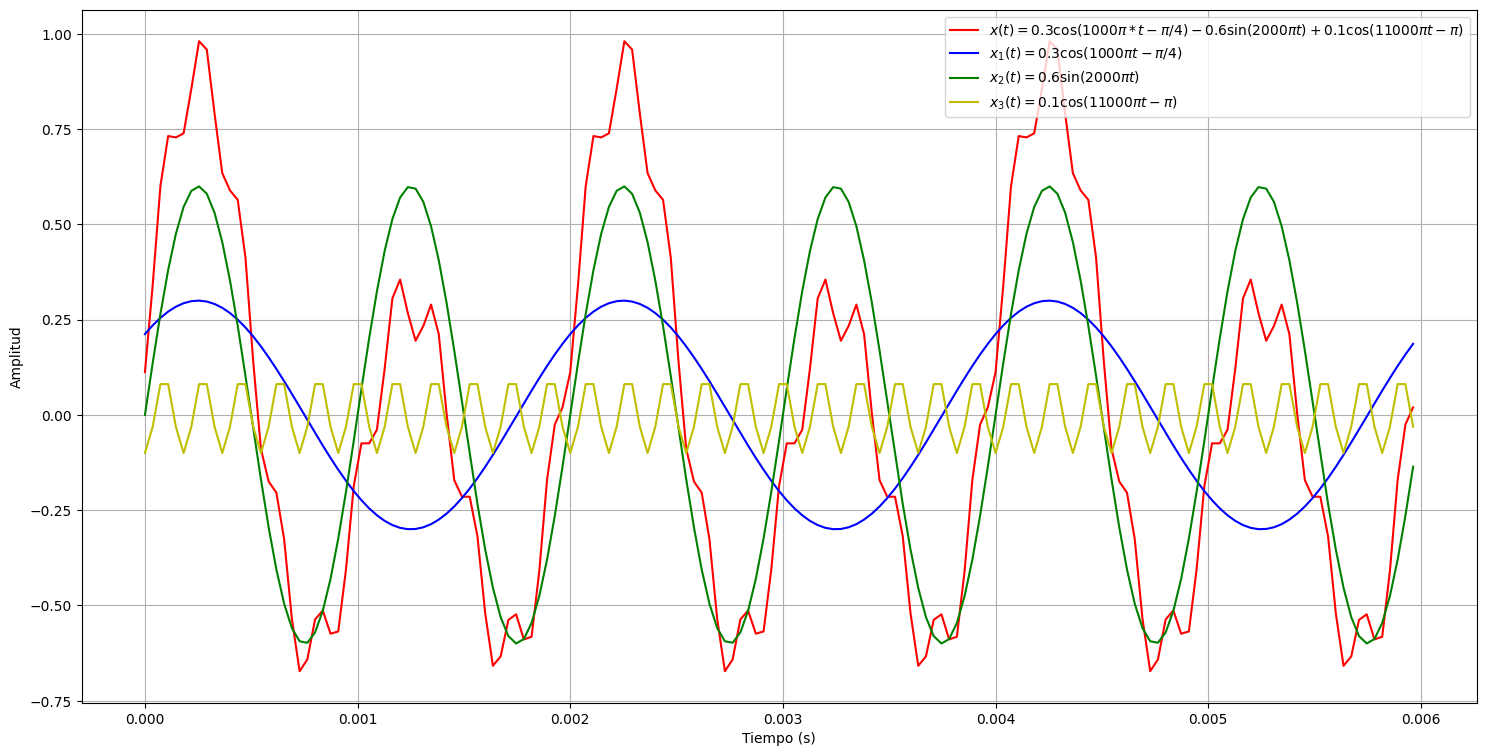

In [6]:
# se construye la señal
x1 = A1*np.cos(W1*tv+K1)
x2 = A2*np.sin(W2*tv+K2)
x3 = A3*np.cos(W3*tv+K3)
x = x1 + x2 + x3
plt.figure(figsize=(18, 9))
plt.plot(tv,x,'r',label='$x(t) = 0.3\cos(1000π*t-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,x1,'b',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,x2,'g',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,x3,'y',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
#Como un segundo paso creamos el cero y pendiente que es el proceso de digitalizacion de la señal segun el ejercicio 1
#crear funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

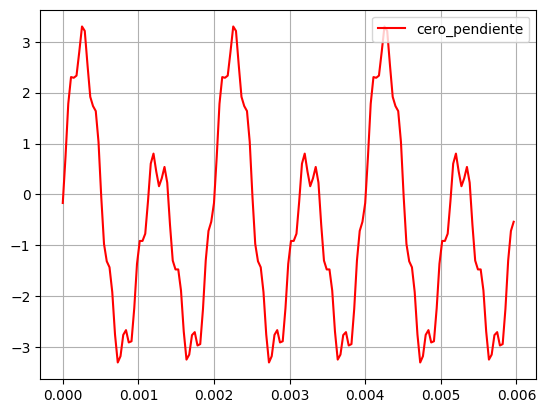

In [8]:
# construimos el cero y pendiente del profesor
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax)
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [9]:
nbits = 5 #numero de bits del ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion

In [10]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [11]:
for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

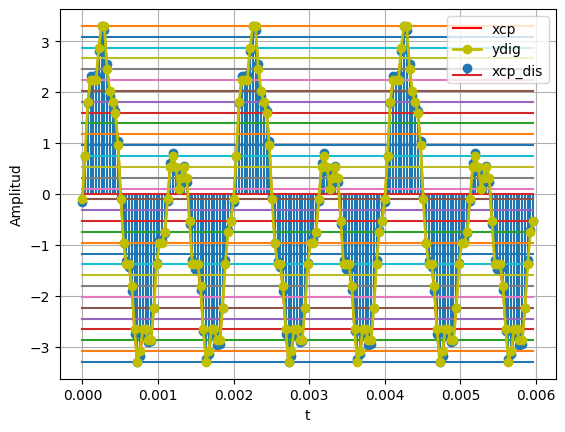

In [12]:
plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Pregunta 2 (valor 2.5 puntos)
Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

x[n]=sin[100πn]+sin[600πn]

In [18]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 04:36:55--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 142.251.188.113, 142.251.188.101, 142.251.188.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.188.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 04:36:55--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    i

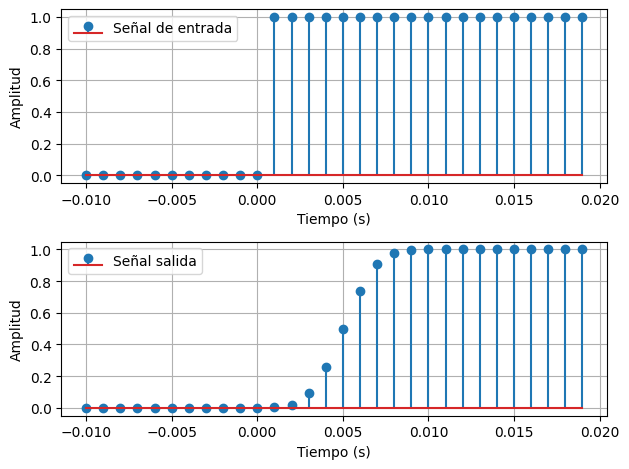

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

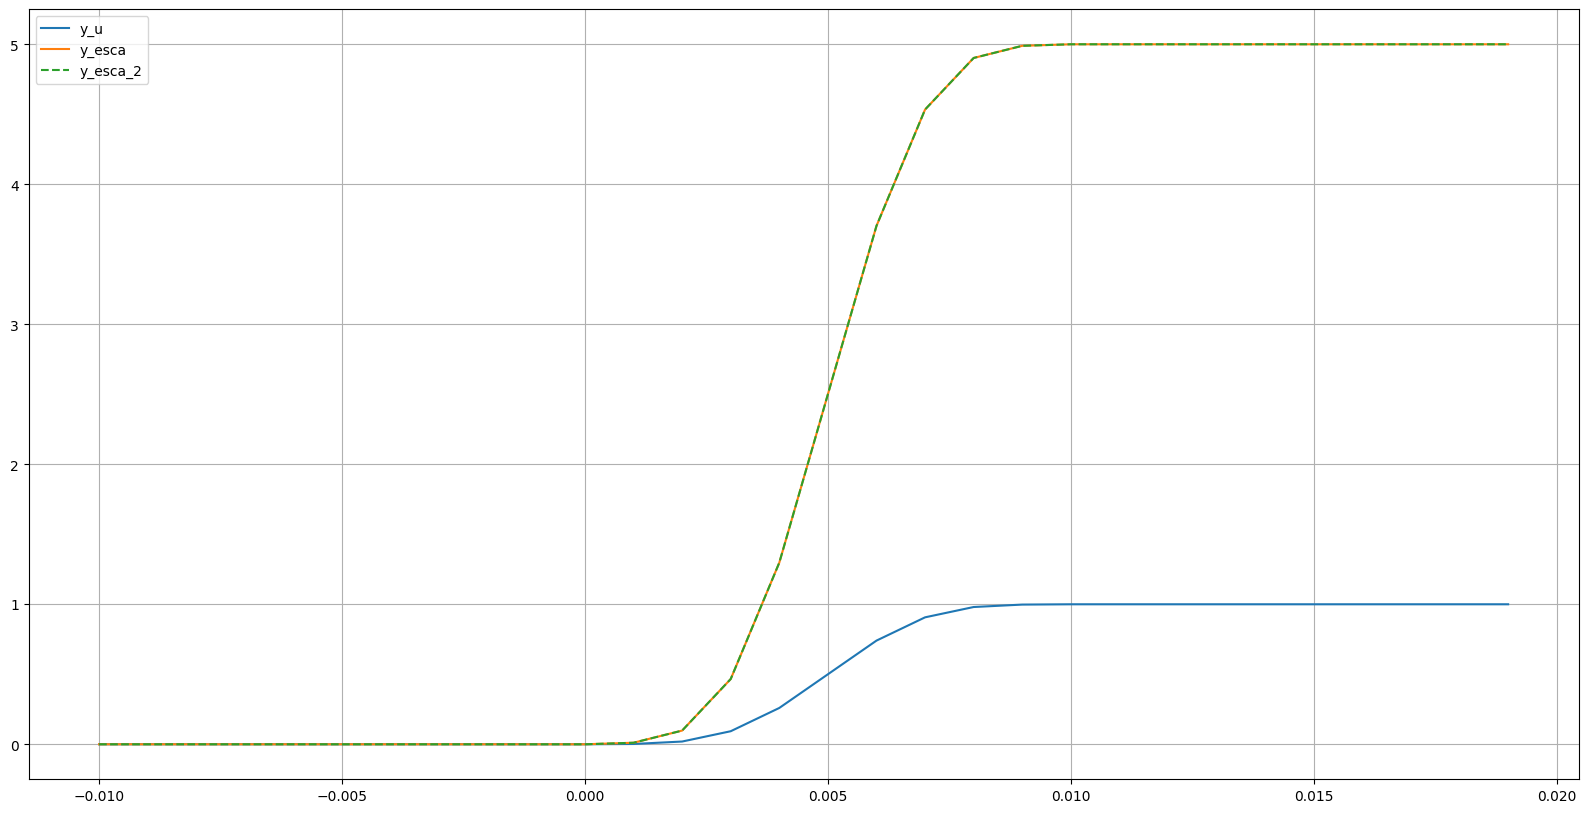

In [20]:
#Se verifica la linealidad
a = 5
su_esca = a*signal_u

y_esca = my_system.predict(su_esca)

y_esca_2 = a*y_u

plt.figure(figsize=(20, 10))
plt.plot(t,y_u,label='y_u')
plt.plot(t,y_esca,label='y_esca')
plt.plot(t,y_esca_2,label='y_esca_2',linestyle="--")
plt.legend()
plt.grid()

<Figure size 2000x1000 with 0 Axes>

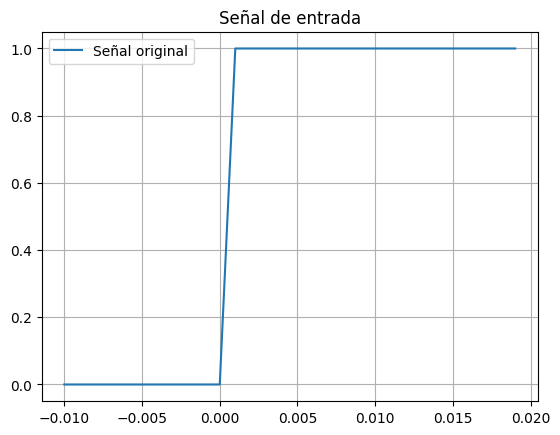

<Figure size 2000x1000 with 0 Axes>

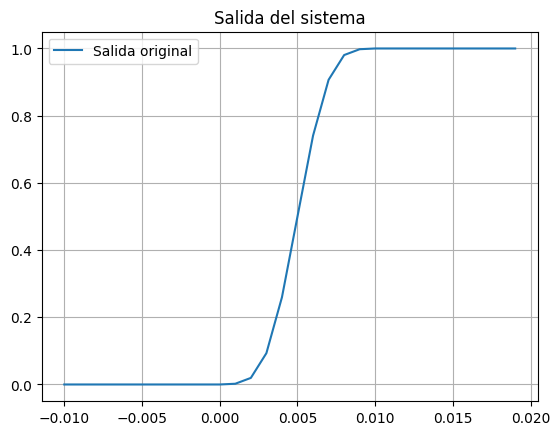

In [21]:
#Se verifica si la señal es invariante en el tiempo

# Desplazar la señal de entrada
k= 0.01  # Número de muestras a desplazar
x=np.heaviside(t-k,1) #Función heaviside

# Obtener la salida del sistema para la señal desplazada
y_u_shifted = my_system.predict(x)


# Visualizar las señales
plt.figure(figsize=(20, 10))
plt.figure()
plt.plot(t, signal_u, label='Señal original')
plt.legend()
plt.title('Señal de entrada')
plt.grid()

plt.figure(figsize=(20, 10))
plt.figure()
plt.plot(t, y_u, label='Salida original')
plt.legend()
plt.title('Salida del sistema')
plt.grid()

plt.show()

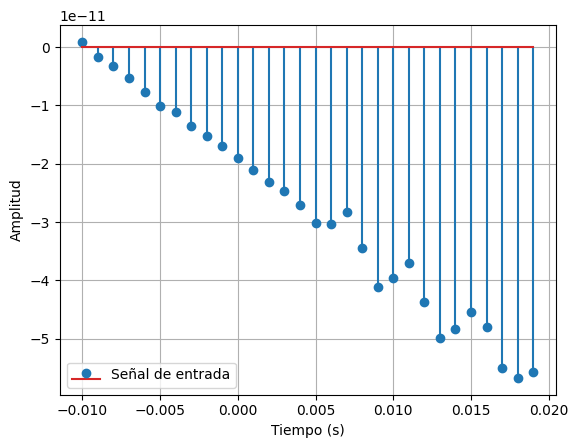

In [22]:
n = t*fs
hu = y_u
h = np.diff(hu).reshape(-1,1)
x = np.sin(100*np.pi*n) + np.sin(600*np.pi*n)
plt.figure()
plt.stem(t, x, label='Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

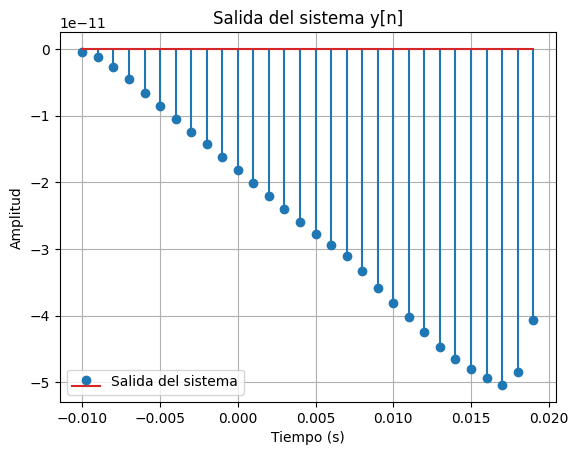

In [23]:
# Realizar la convolución
# h fue redimensionado a un arreglo 2D, convolve espera arreglos 1D
# aplanar h a un arreglo 1D
y_salida = np.convolve(x, h.flatten(), mode='same')

# Visualización de la salida
plt.figure()
plt.stem(t, y_salida[:len(t)], label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()